<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149877706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=c5668a505b4a9a5e1305100686ba21185fa414a76a7624b34c827c131dac11e5
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.151165,1.817924,0.119199,1.896106,14.109394,12.501236,14.592299,17.549492,2.297258,0.636688,...,0.139077,4.183040,3.877805,3.957754,3.761001,0.429902,6.329353,0.455509,0.936848,0.000663
2014-11-25,12.042439,1.818228,0.119608,1.900647,14.109176,12.529916,14.631344,17.601577,2.299545,0.638592,...,0.138733,4.217107,3.877958,3.974304,3.761043,0.430158,6.358922,0.456135,0.940173,0.000660
2014-11-26,12.036767,1.816902,0.119822,1.906313,14.098466,12.527500,14.663593,17.631151,2.296652,0.639657,...,0.138628,4.220718,3.875654,3.994126,3.757286,0.430619,6.380551,0.456335,0.941593,0.000659
2014-11-27,12.051621,1.822977,0.119911,1.902090,14.136217,12.466651,14.656905,17.617528,2.302182,0.638377,...,0.138999,4.216745,3.886138,3.988212,3.767347,0.431377,6.408077,0.457557,0.944114,0.000661
2014-11-28,12.070921,1.828279,0.119437,1.907452,14.189576,12.423404,14.701364,17.669935,2.309935,0.640185,...,0.139730,4.238858,3.900807,4.003266,3.781064,0.432214,6.392277,0.458024,0.947931,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,14.000258,2.753052,0.144161,1.973000,21.629258,15.758842,23.950587,23.106117,2.960239,0.942743,...,0.076149,5.217779,5.942920,4.626282,5.765650,0.607973,0.761478,0.667426,0.591448,0.000888
2023-11-05,14.028703,2.754434,0.144229,1.975357,21.617396,15.762479,23.960535,23.111666,2.959783,0.942598,...,0.076107,5.214917,5.938845,4.668752,5.762488,0.607640,0.761061,0.667059,0.591124,0.000887
2023-11-06,13.984933,2.756171,0.143781,1.972849,21.603954,15.744936,23.974342,23.085486,2.965131,0.941771,...,0.075937,5.211675,5.935152,4.659338,5.761823,0.608734,0.760587,0.666645,0.590756,0.000887


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== INR ========================================
2023-11-08 15:27:00,787 - Unknown integration target: 
2023-11-08 15:27:08,769 - Unknown integration target: 
2023-11-08 15:27:17,246 - Unknown integration target: 
2023-11-08 15:27:25,558 - Unknown integration target: 
2023-11-08 15:27:33,556 - Unknown integration target: 
2023-11-08 15:27:51,275 - Unknown integration target: 
2023-11-08 15:28:08,931 - Unknown integration target: 
2023-11-08 15:28:26,439 - Unknown integration target: 
2023-11-08 15:28:28,829 - Unknown integration target: 
2023-11-08 15:28:28,833 - Unknown integration target: 
2023-11-08 15:28:36,649 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 262.4 MiB
2023-11-08 15:28:36,653 - ApiComposer - Initial pipeline was fitted in 5.3 sec.
2023-11-08 15:28:36,657 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 15:35:22,525 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [06:45<?, ?gen/s]

2023-11-08 15:35:22,559 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-11-08 15:35:30,968 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [rfr, glm, data_source_ts/INR, lagged]}
rfr - {'n_jobs': -1}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
lagged - {'window_size': 10} 
Initial metric: 0.001
  0%|          | 25/100000 [04:47<533:08:42, 19.20s/trial, best loss: 0.0007258974691565493]
2023-11-08 15:41:43,562 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [rfr, glm, data_source_ts/INR, lagged]}
rfr - {'n_jobs': -1, 'bootstrap': False, 'max_features': 0.8077074819536291, 'min_samples_leaf': 4, 'min_samples_split': 8}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/INR - {}
lagged - {'window_size': 10}
2023-11-08 15:41:43,566 - PipelineTuner - Final metric: 0.001
2023-11-08 15:41:43,572 - ApiComposer - Hyperparameters tuning finished
2023-11-08 15:41:43,968 - ApiComposer - Model generation finished
2023-11-08 15:41:51,805 - FEDOT logger - Final pipeline was fi

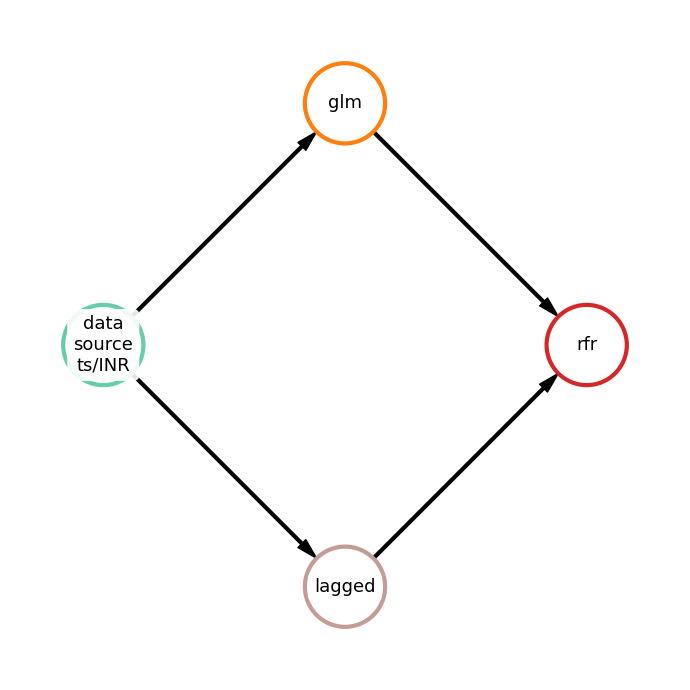

[0.24432317 0.24457305 0.24506412]
{'mae': 0.001, 'mape': 0.005}


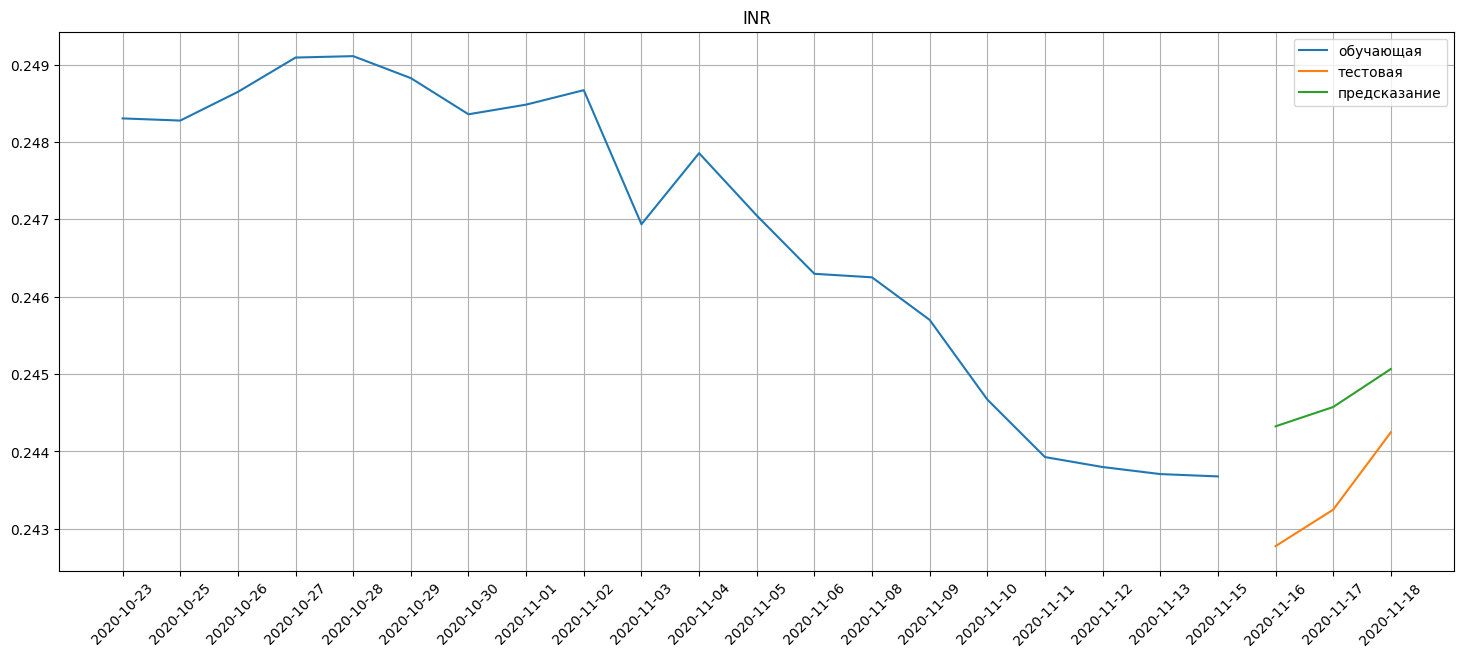


======================================== CNY ========================================
2023-11-08 15:42:07,292 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-08 15:42:07,296 - ApiComposer - Initial pipeline was fitted in 10.1 sec.
2023-11-08 15:42:07,301 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 15:42:07,329 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 34 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 15:51:48,121 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [09:40<?, ?gen/s]

2023-11-08 15:51:48,163 - ApiComposer - Hyperparameters tuning started with 24 min. timeout


2023-11-08 15:51:51,459 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [arima, data_source_ts/CNY]}
arima - {'p': 2, 'd': 1, 'q': 2}
data_source_ts/CNY - {} 
Initial metric: 0.001
  0%|          | 157/100000 [24:04<256:45:45,  9.26s/trial, best loss: 0.0010073190206627565]
2023-11-08 16:16:02,429 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [arima, data_source_ts/CNY]}
arima - {'p': 2, 'd': 1, 'q': 2}
data_source_ts/CNY - {}
2023-11-08 16:16:02,437 - PipelineTuner - Final metric: 0.001
2023-11-08 16:16:02,457 - ApiComposer - Hyperparameters tuning finished
2023-11-08 16:16:03,439 - ApiComposer - Model generation finished
2023-11-08 16:16:05,059 - FEDOT logger - Final pipeline was fitted
2023-11-08 16:16:05,072 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [arima, data_source_ts/CNY]}
arima - {'p': 2, 'd': 1, 'q': 2}
data_source_ts/CNY - {}
Memory consumption for finish in main session: current 14.3 MiB, max: 61.9 MiB

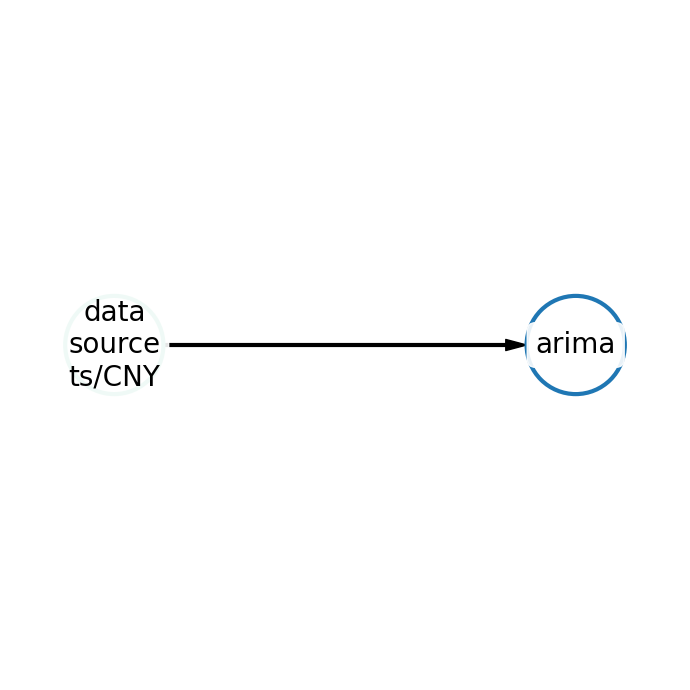

[2.8620829  2.86203186 2.86205296]
{'mae': 0.008, 'mape': 0.003}


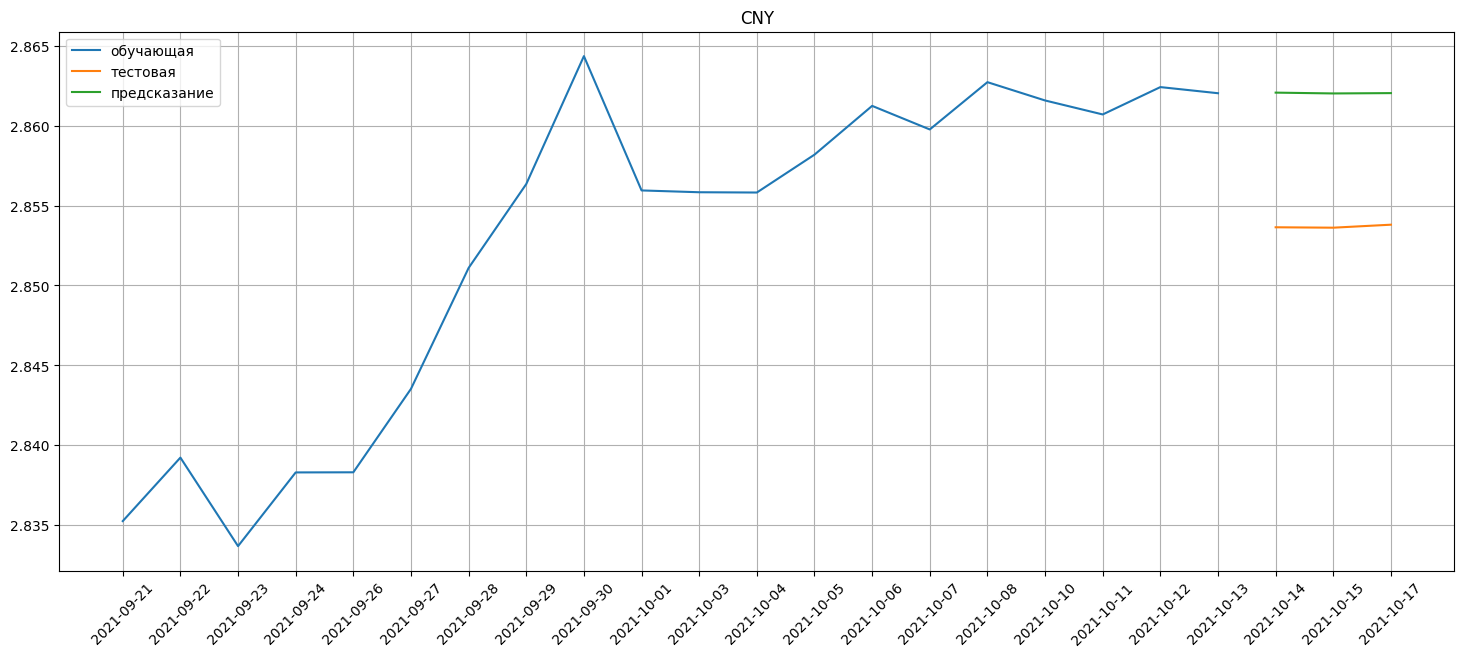


======================================== CZK ========================================
2023-11-08 16:16:41,374 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.3 MiB
2023-11-08 16:16:41,379 - ApiComposer - Initial pipeline was fitted in 14.9 sec.
2023-11-08 16:16:41,384 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 16:16:41,408 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 14 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 16:24:43,856 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [08:02<?, ?gen/s]

2023-11-08 16:24:43,900 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-11-08 16:25:31,013 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [sgdr, ridge, ridge, glm, data_source_ts/CZK, ridge, lagged, linear, decompose]}
sgdr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CZK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.007
 80%|████████  | 8/10 [06:25<01:36, 48.19s/trial, best loss: 0.006110199524619228]
2023-11-08 16:31:56,623 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-08 16:32:41,965 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [sgdr, ridge, ridge, glm, data_source_ts/CZK, ridge, lagged, linear, decompose]}
sgdr - {}
ridge - {'alpha': 6.51164151730085}
ridge - {'alpha': 2.8646097257567544}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/CZK - {}
ridge - {'alpha': 2.428431688205031}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-08 16:32:41

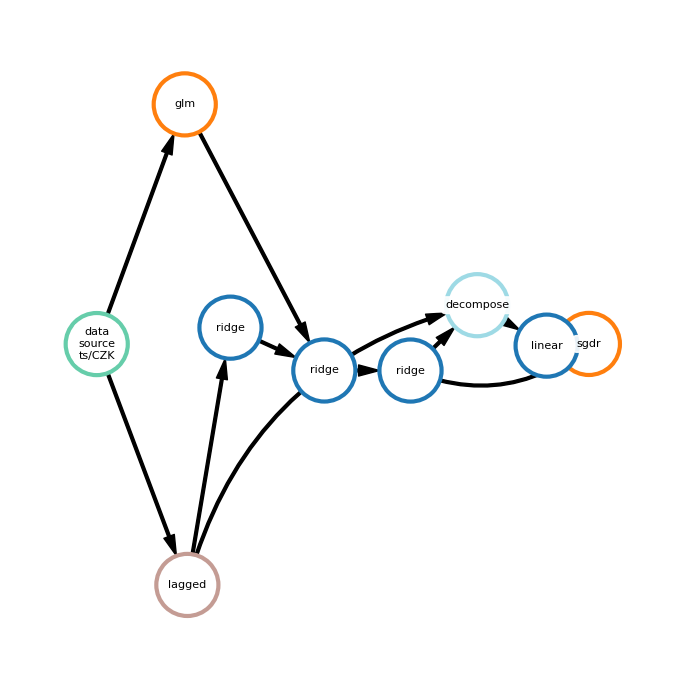

[0.8296835  0.82906611 0.8279986  0.83012201 0.8295249  0.82844299
 0.82914557 0.83005394 0.83012113 0.82807139]
{'mae': 0.014, 'mape': 0.016}


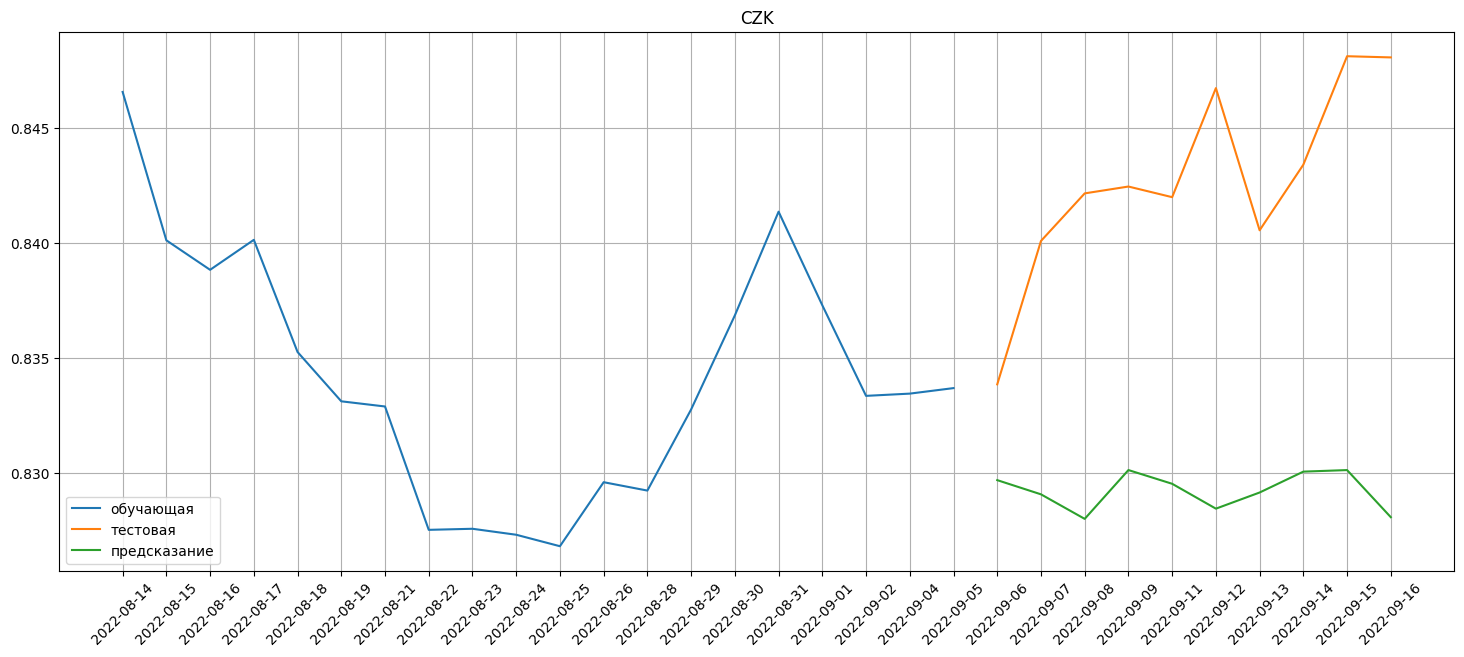


======================================== VND ========================================
2023-11-08 16:33:40,332 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.2 MiB
2023-11-08 16:33:40,344 - ApiComposer - Initial pipeline was fitted in 10.9 sec.
2023-11-08 16:33:40,354 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 16:33:40,379 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 2 min. Set of candidate models: ['lagged', 'ts_naive_average', 'diff_filter', 'ar', 'polyfit', 'sparse_lagged', 'cut', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'pca', 'diff_filter', 'ar', 'sparse_lagged', 'rfr', 'lasso', 'ransac_lin_reg', 'smoothing', 'ransac_non_lin_reg', 'ets', 'lagged', 'sgdr', 'ts_naive_average', 'ridge', 'polyfit', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'linear', 'gaussian_filter', 'adareg', 'scaling'].
2023-11-08

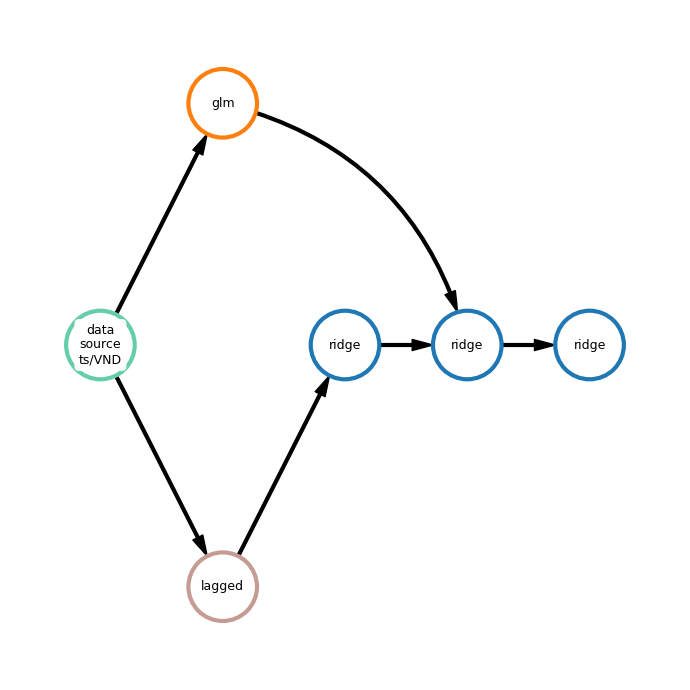

[0.00074206 0.00074212 0.00074217 0.00074223 0.00074228 0.00074234
 0.00074239 0.00074244 0.00074249 0.00074254 0.0007426  0.00074265
 0.0007427  0.00074276 0.00074281 0.00074286 0.00074292 0.00074297
 0.00074303]
{'mae': 0.0, 'mape': 0.063}


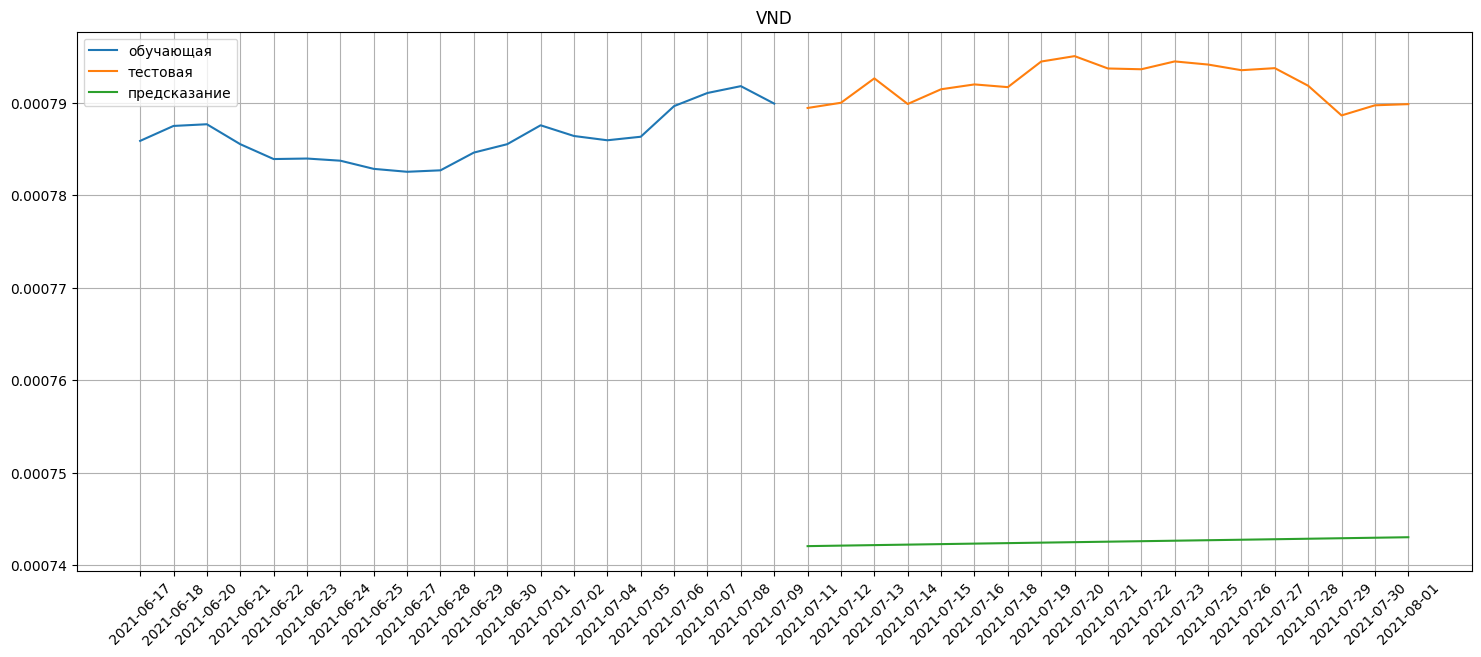


======================================== INR ========================================
2023-11-08 16:36:22,460 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.5 MiB
2023-11-08 16:36:22,468 - ApiComposer - Initial pipeline was fitted in 10.1 sec.
2023-11-08 16:36:22,474 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 16:36:22,499 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 11 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-08 16:43:49,216 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [07:26<?, ?gen/s]

2023-11-08 16:43:49,244 - ApiComposer - Hyperparameters tuning started with 3 min. timeout


2023-11-08 16:44:28,234 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/INR, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.001
 60%|██████    | 6/10 [03:59<02:39, 39.95s/trial, best loss: 0.0010069723567715865]
2023-11-08 16:48:28,045 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-08 16:49:11,950 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/INR, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'reg_alpha': 2.35612003

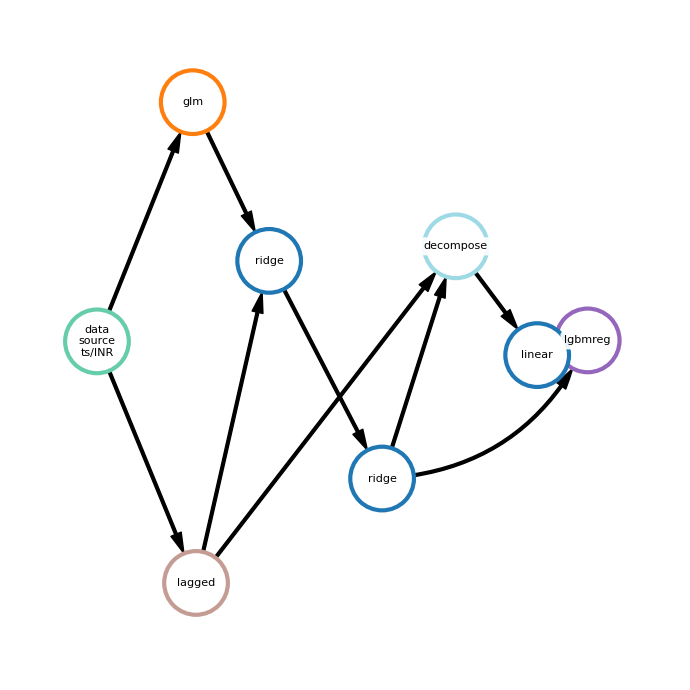

[0.24763964 0.24800659 0.24819936 0.24814158 0.24822195 0.24802475
 0.24807744 0.24783827 0.24797049 0.24760274 0.24695085 0.24749997
 0.24735905 0.24744954 0.24731547]
{'mae': 0.001, 'mape': 0.004}


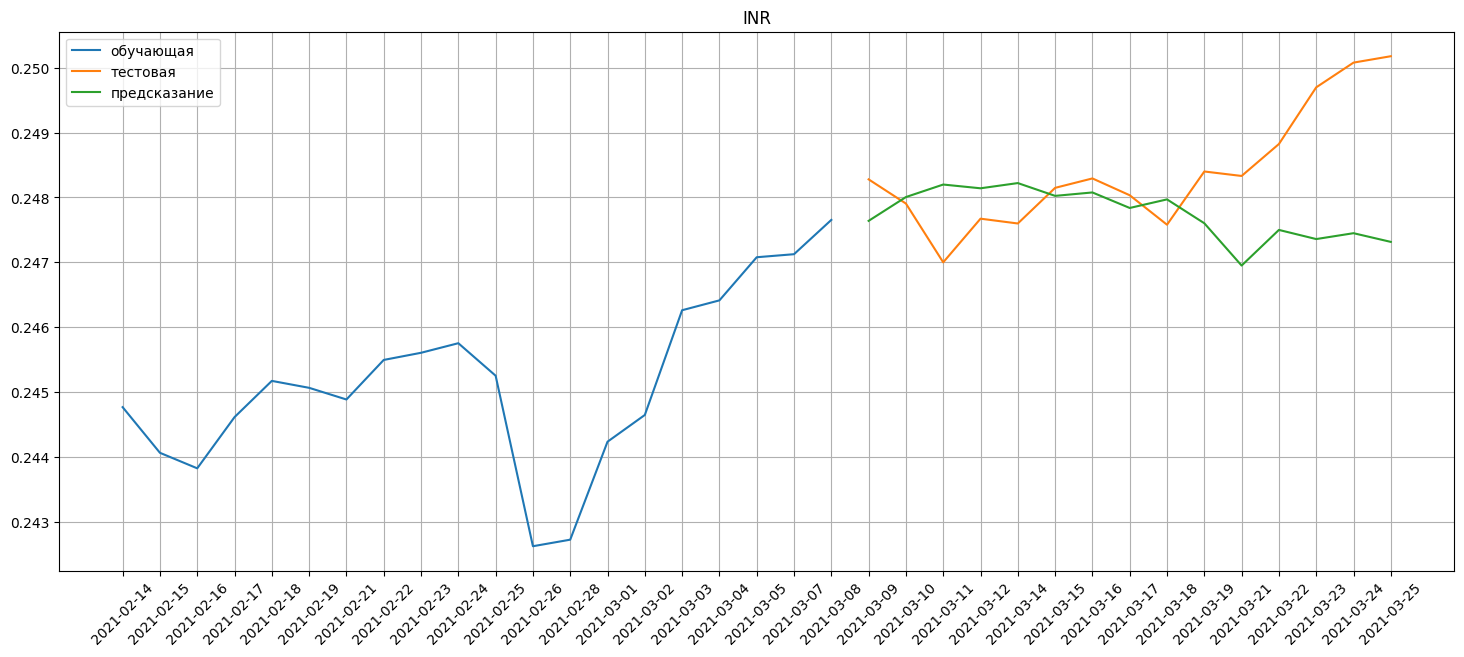


======================================== SGD ========================================
2023-11-08 16:50:20,643 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-08 16:50:20,649 - ApiComposer - Initial pipeline was fitted in 18.7 sec.
2023-11-08 16:50:20,654 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-08 16:50:20,694 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['lagged', 'ts_naive_average', 'diff_filter', 'ar', 'polyfit', 'sparse_lagged', 'cut', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'pca', 'diff_filter', 'ar', 'sparse_lagged', 'rfr', 'lasso', 'ransac_lin_reg', 'smoothing', 'ransac_non_lin_reg', 'ets', 'lagged', 'sgdr', 'ts_naive_average', 'ridge', 'polyfit', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'linear', 'gaussian_filter', 'adareg', 'scaling'].
2023-11-08

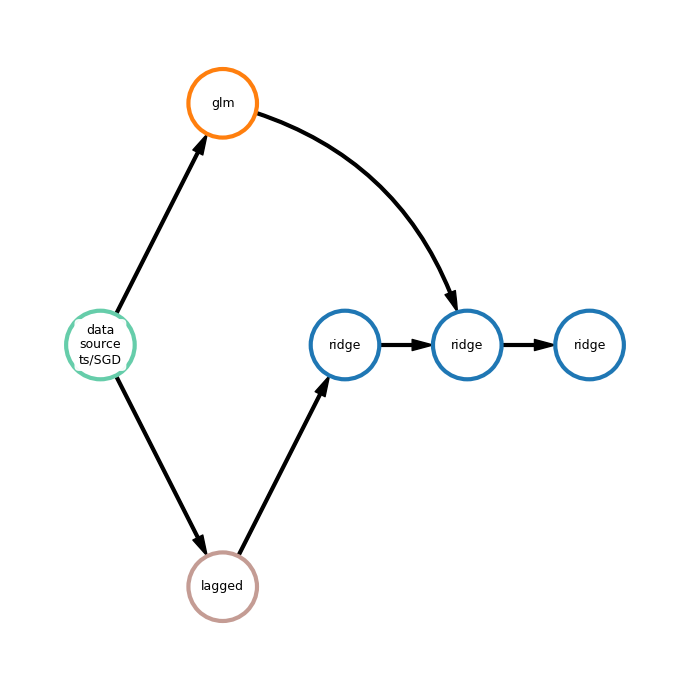

[15.53521741 15.53791004 15.54061516 15.54335106 15.54606786 15.54885157
 15.55165097 15.55443847 15.55728008 15.56021245]
{'mae': 0.017, 'mape': 0.001}


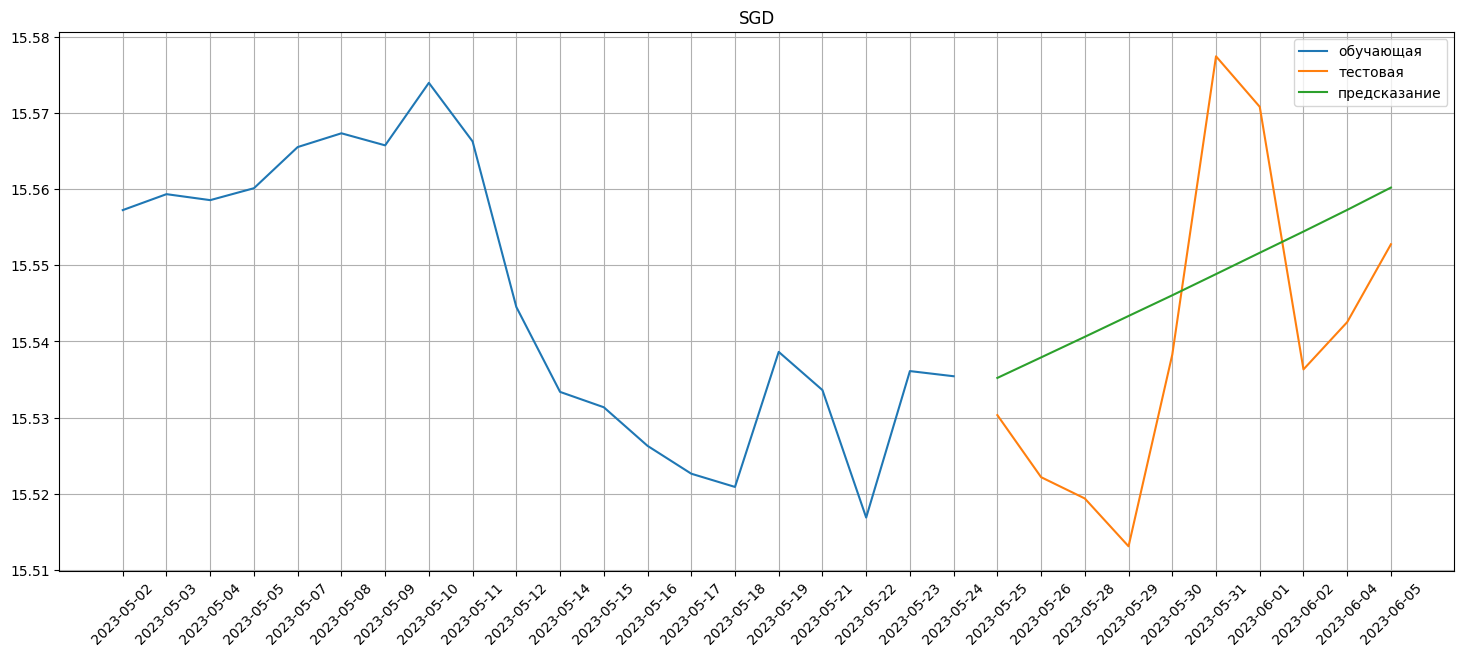


======================================== PLN ========================================
2023-11-08 16:55:50,755 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.0 MiB
2023-11-08 16:55:50,761 - ApiComposer - Initial pipeline was fitted in 8.4 sec.
2023-11-08 16:55:50,766 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 16:55:50,804 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 22 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr', 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 19:44:35,562 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [2:48:44<?, ?gen/s]

2023-11-08 19:44:35,590 - ApiComposer - Time for pipeline composing was 2:48:44.771718.
The remaining 146.9 seconds are not enough to tune the hyperparameters.
2023-11-08 19:44:35,594 - ApiComposer - Composed pipeline returned without tuning.


2023-11-08 19:44:35,985 - ApiComposer - Model generation finished
2023-11-08 19:44:43,767 - FEDOT logger - Final pipeline was fitted
2023-11-08 19:44:43,776 - FEDOT logger - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/PLN, ridge, lagged]}
ridge - {}
ridge - {'alpha': 6.477397475785532}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PLN - {}
ridge - {'alpha': 7.809911518370393}
lagged - {'window_size': 9.540172931821617}
Memory consumption for finish in main session: current 1.1 MiB, max: 12.6 MiB


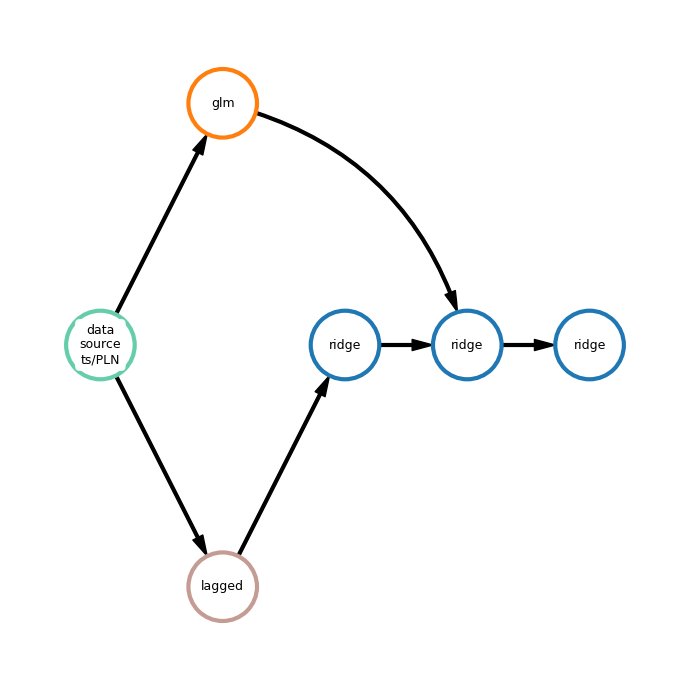

[4.84437035 4.84396635 4.84371766 4.84341982 4.84324866 4.84301436
 4.84279657 4.84266562 4.84256799 4.84252498 4.84247583 4.84248274
 4.84249368]
{'mae': 0.074, 'mape': 0.016}


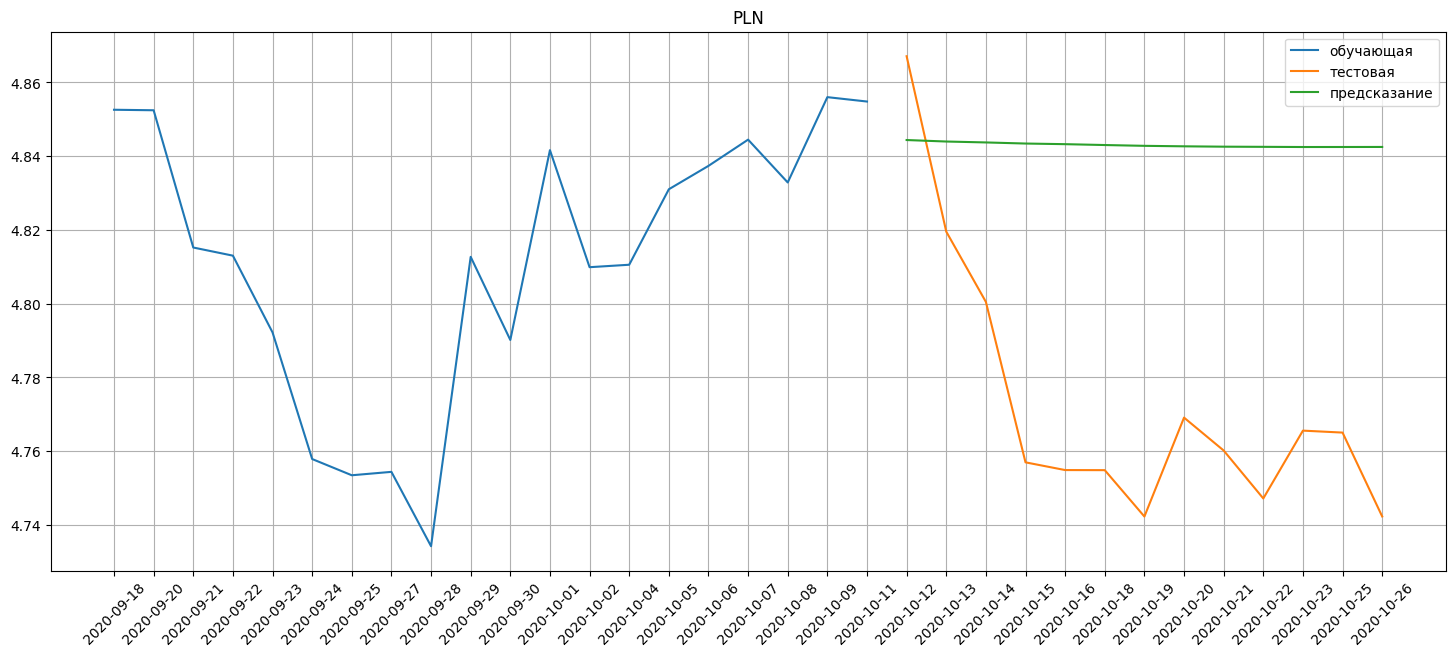


======================================== ZAR ========================================
2023-11-08 19:44:59,293 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-08 19:44:59,298 - ApiComposer - Initial pipeline was fitted in 12.9 sec.
2023-11-08 19:44:59,305 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 19:44:59,335 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 31 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 20:20:45,088 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [35:45<?, ?gen/s]

2023-11-08 20:20:45,117 - ApiComposer - Time for pipeline composing was 0:35:45.765546.
The remaining 5.0 seconds are not enough to tune the hyperparameters.
2023-11-08 20:20:45,121 - ApiComposer - Composed pipeline returned without tuning.


2023-11-08 20:20:45,719 - ApiComposer - Model generation finished
2023-11-08 20:20:59,192 - FEDOT logger - Final pipeline was fitted
2023-11-08 20:20:59,198 - FEDOT logger - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ZAR, ridge, lagged]}
ridge - {}
ridge - {'alpha': 6.995115546533433}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ZAR - {}
ridge - {}
lagged - {'window_size': 10}
Memory consumption for finish in main session: current 1.0 MiB, max: 44.9 MiB


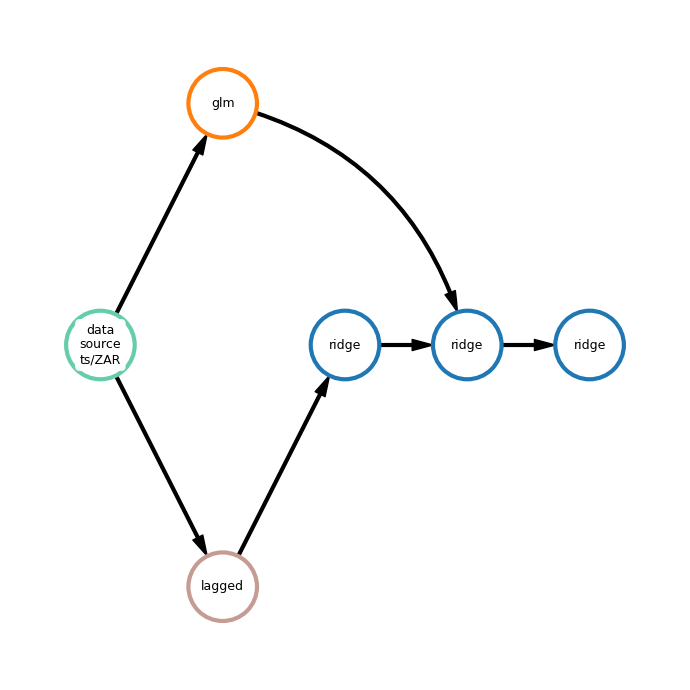

[1.21583448 1.21571537]
{'mae': 0.015, 'mape': 0.012}


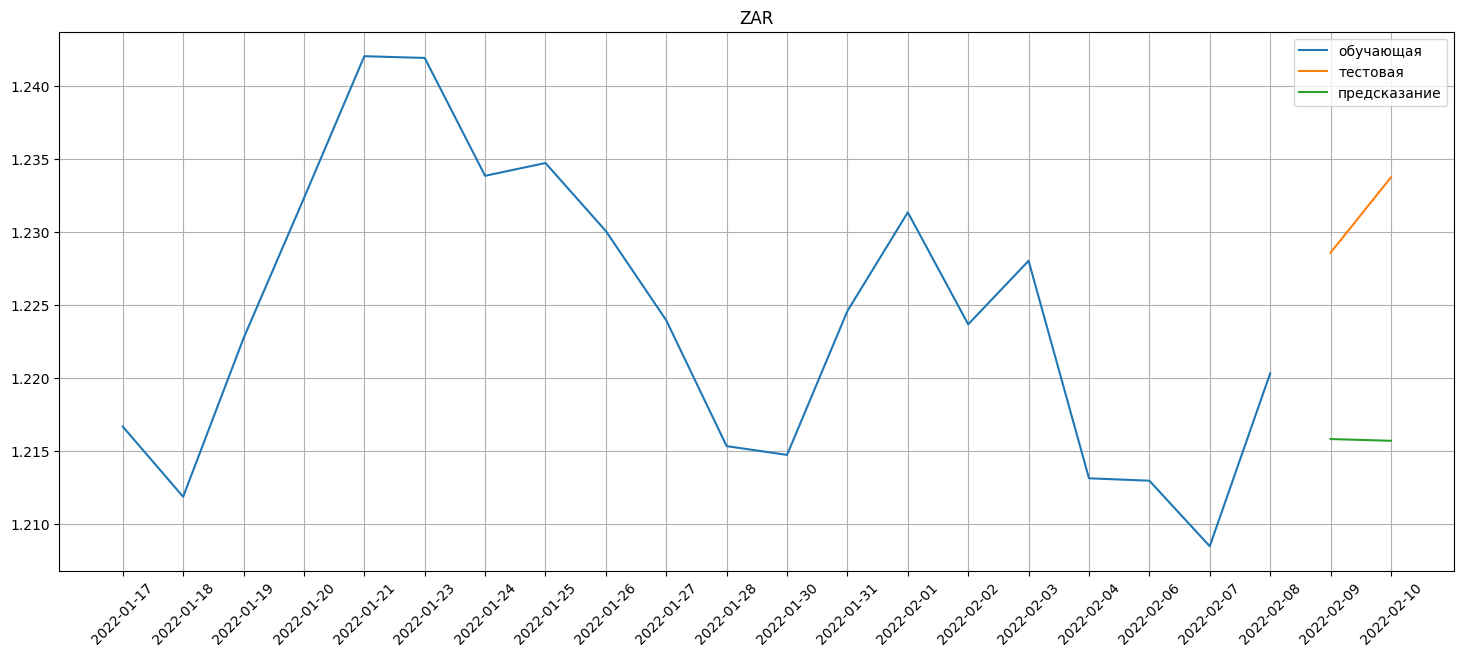


======================================== THB ========================================
2023-11-08 20:21:19,462 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.0 MiB
2023-11-08 20:21:19,467 - ApiComposer - Initial pipeline was fitted in 16.3 sec.
2023-11-08 20:21:19,471 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 20:21:19,494 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 38 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 20:44:06,006 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [22:46<?, ?gen/s]

2023-11-08 20:44:06,039 - ApiComposer - Hyperparameters tuning started with 15 min. timeout


2023-11-08 20:44:29,626 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, arima, data_source_ts/THB, ridge, lagged]}
ridge - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/THB - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.003
  0%|          | 31/100000 [11:34<918:48:45, 33.09s/trial, best loss: 0.0021928858891092475] 
2023-11-08 21:00:37,022 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, arima, data_source_ts/THB, ridge, lagged]}
ridge - {'alpha': 1.1267051420203922}
ridge - {'alpha': 4.659304072586896}
arima - {'p': 5, 'd': 0, 'q': 5}
data_source_ts/THB - {}
ridge - {'alpha': 0.37081648830876146}
lagged - {'window_size': 216}
2023-11-08 21:00:37,029 - PipelineTuner - Final metric: 0.002
2023-11-08 21:00:37,036 - ApiComposer - Hyperparameters tuning finished
2023-11-08 21:00:37,694 - ApiComposer - Model generation finished
2023-11-08 21:01:08,422 - FEDOT logger - Final pipeline was

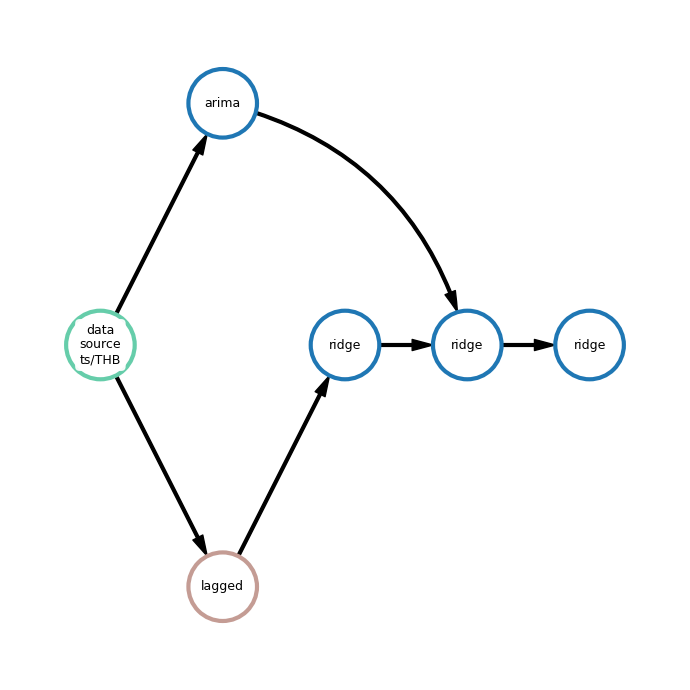

[0.60601194 0.60605179 0.60608859 0.60611638 0.6061391  0.60616189
 0.60617951]
{'mae': 0.002, 'mape': 0.003}


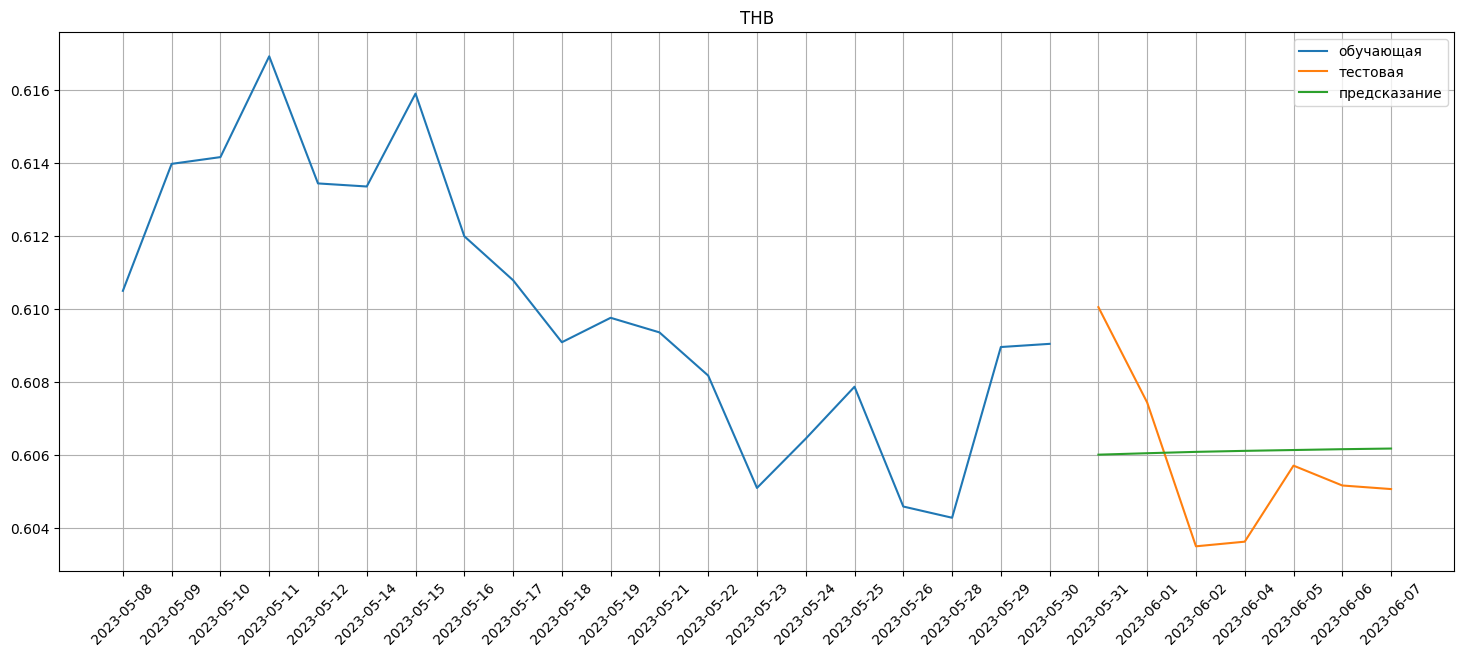


======================================== GBP ========================================
2023-11-08 21:01:25,461 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.8 MiB
2023-11-08 21:01:25,470 - ApiComposer - Initial pipeline was fitted in 12.8 sec.
2023-11-08 21:01:25,476 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-08 21:01:25,504 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 57 min. Set of candidate models: ['lagged', 'stl_arima', 'arima', 'clstm', 'diff_filter', 'ts_naive_average', 'ar', 'cut', 'sparse_lagged', 'polyfit', 'glm', 'locf', 'smoothing', 'gaussian_filter', 'ets', 'diff_filter', 'ar', 'rfr', 'lasso', 'smoothing', 'treg', 'stl_arima', 'lagged', 'cut', 'glm', 'normalization', 'locf', 'dtreg', 'exog_ts', 'gaussian_filter', 'lgbmreg', 'svr', 'poly_features', 'scaling', 'fast_ica', 'pca', 'isolation_forest_reg', 'gbr',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-08 21:26:53,147 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [25:27<?, ?gen/s]

2023-11-08 21:26:53,180 - ApiComposer - Hyperparameters tuning started with 31 min. timeout


2023-11-08 21:27:10,770 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 6, 'nodes': [ridge, ridge, lagged, data_source_ts/GBP, adareg, glm]}
ridge - {'alpha': 4.2487528745180585}
ridge - {}
lagged - {'window_size': 9.726837832157502}
data_source_ts/GBP - {}
adareg - {}
glm - {'family': 'gaussian', 'link': 'identity'} 
Initial metric: 0.103
  0%|          | 72/100000 [27:18<733:42:24, 26.43s/trial, best loss: 0.07913624147077172]
2023-11-08 21:58:52,422 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 6, 'nodes': [ridge, ridge, lagged, data_source_ts/GBP, adareg, glm]}
ridge - {'alpha': 9.501107113363657}
ridge - {'alpha': 4.376107215298095}
lagged - {'window_size': 216}
data_source_ts/GBP - {}
adareg - {'learning_rate': 0.9516420670252269, 'loss': 'linear'}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
2023-11-08 21:58:52,427 - PipelineTuner - Final metric: 0.087
2023-11-08 21:58:52,436 - ApiComposer - Hyperparameters tuning finished
2023-11-08 21:58:53,069 -

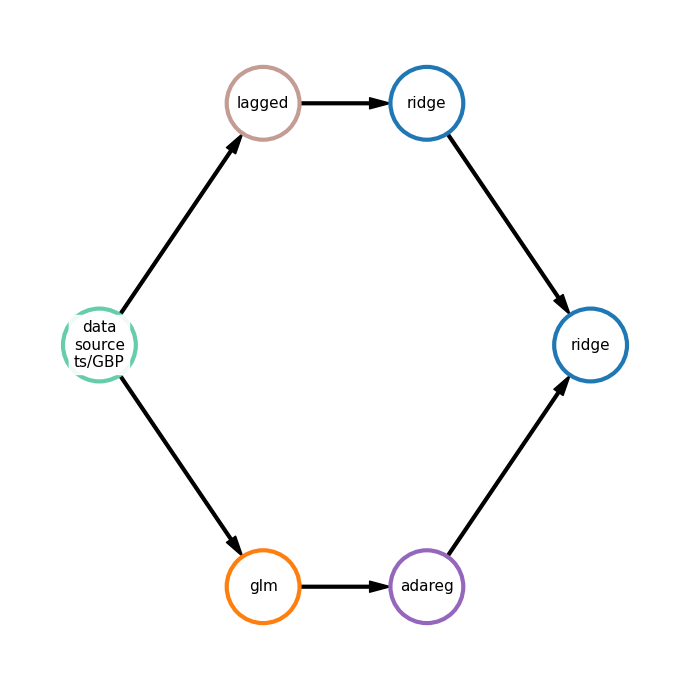

[25.18693915 25.19051077 25.18694852 25.17788618 25.17595281 25.16880819
 25.1638849  25.15607085 25.14338673 25.13707378 25.13556928 25.135882
 25.13319782 25.12670024 25.1198    ]
{'mae': 0.325, 'mape': 0.013}


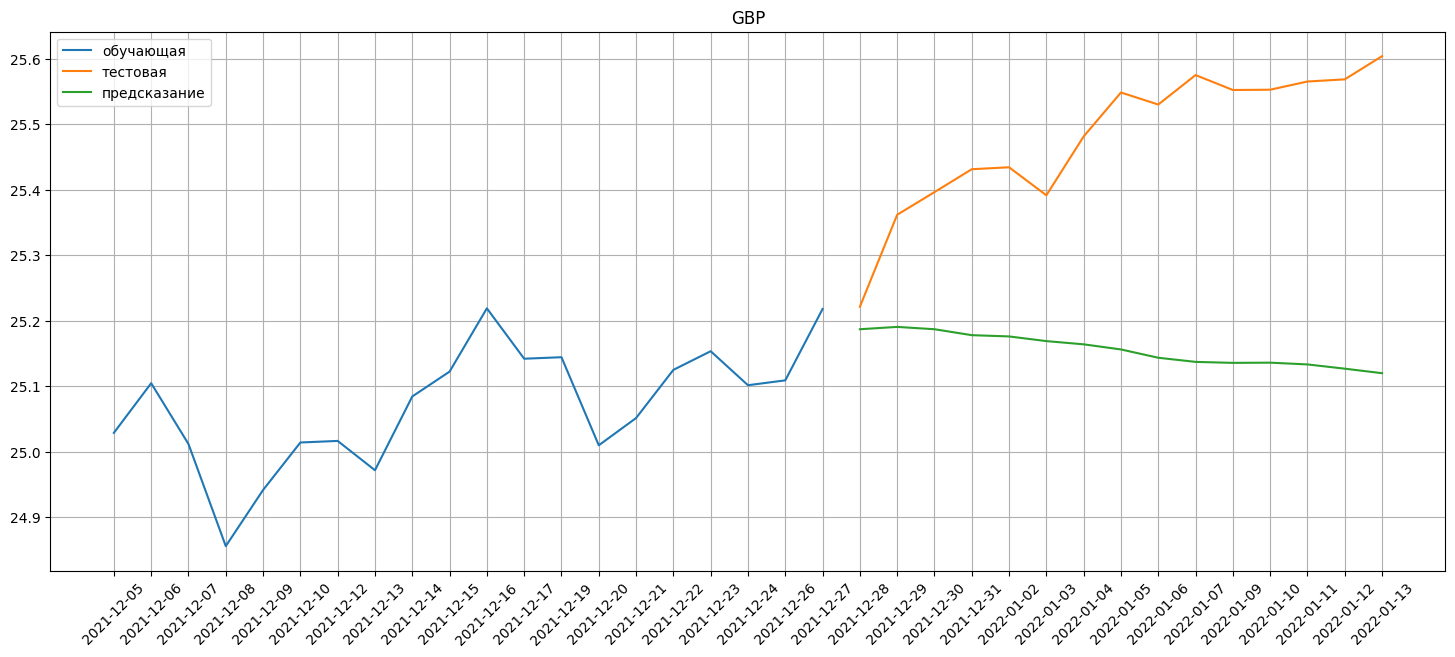

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
57,"(2023, 11, 8, 16, 49, 57, 2, 312, 0)",SGD,10,134,5,0.001
58,"(2023, 11, 8, 16, 55, 41, 2, 312, 0)",PLN,13,950,22,0.016
59,"(2023, 11, 8, 19, 44, 45, 2, 312, 0)",ZAR,2,545,31,0.012
60,"(2023, 11, 8, 20, 21, 0, 2, 312, 0)",THB,7,132,38,0.003


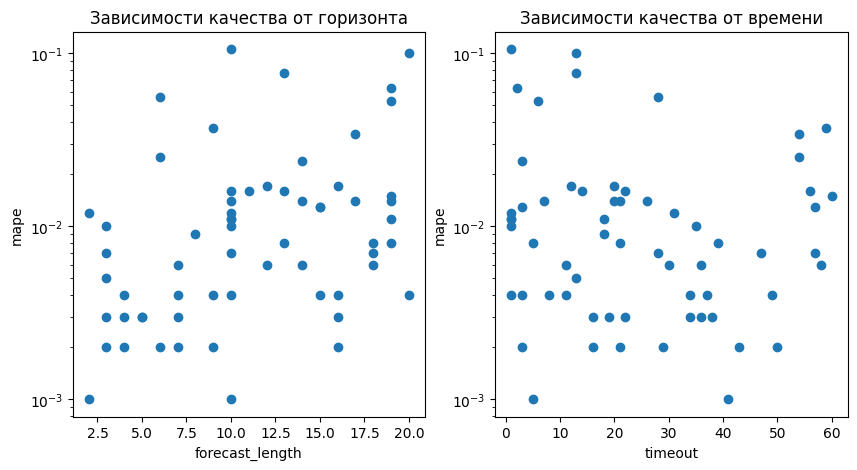

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()